In [25]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns
import calendar
import string

In [26]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [27]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [28]:
alk_base = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/Alkalinity/ALK_baseline_2.6_weighted_dp.nc', decode_times=True)
alk_oae = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/Alkalinity/ALK_oae_2.6_weighted_dp.nc', decode_times=True)

co2flux_base = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/CO2flux/CO2flux_Baseline_2.6_cropped.nc', decode_times=True)
co2flux_oae = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/CO2flux/CO2flux_OAE_2.6_cropped.nc', decode_times=True)

dic_base = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/DIC/DIC_baseline_2.6_weighted_dp.nc', decode_times=True)
dic_oae = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/DIC/DIC_oae_2.6_weighted_dp.nc', decode_times=True)

fco2_base = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/FCO2/fco2_baseline_2.6_cropped.nc', decode_times=True)
fco2_oae = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/FCO2/fco2_OAE_2.6_cropped.nc', decode_times=True)

ph_base = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/pH/ph_baseline_2.6_cropped.nc', decode_times=True)
ph_oae = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/pH/ph_OAE_2.6_cropped.nc', decode_times=True)

In [29]:
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

In [30]:
co2flux_base = co2flux_base.where((3 < co2flux_base.nav_lon) & (co2flux_base.nav_lon < 3.1) & (52 < co2flux_base.nav_lat) & (co2flux_base.nav_lat < 53), drop=True)
co2flux_oae = co2flux_oae.where((3 < co2flux_oae.nav_lon) & (co2flux_oae.nav_lon < 3.1) & (52 < co2flux_oae.nav_lat) & (co2flux_oae.nav_lat < 53), drop=True)

fco2_base = fco2_base.where((3 < fco2_base.nav_lon) & (fco2_base.nav_lon < 3.1) & (52 < fco2_base.nav_lat) & (fco2_base.nav_lat < 53), drop=True)
fco2_oae = fco2_oae.where((3 < fco2_oae.nav_lon) & (fco2_oae.nav_lon < 3.1) & (52 < fco2_oae.nav_lat) & (fco2_oae.nav_lat < 53), drop=True)

ph_base = ph_base.where((3 < ph_base.nav_lon) & (ph_base.nav_lon < 3.1) & (52 < ph_base.nav_lat) & (ph_base.nav_lat < 53), drop=True)
ph_oae = ph_oae.where((3 < ph_oae.nav_lon) & (ph_oae.nav_lon < 3.1) & (52 < ph_oae.nav_lat) & (ph_oae.nav_lat < 53), drop=True)

In [31]:
# alkalinity

alk_base = alk_base.sel(time_counter=slice('2090','2100'))
alk_oae = alk_oae.sel(time_counter=slice('2090','2100'))

month_length_baseline = alk_base.time_counter.dt.days_in_month
alk_weighted_season_baseline = ((alk_base * month_length_baseline).resample(time_counter='M').sum() / month_length_baseline.resample(time_counter='M').sum())

month_length_oae = alk_oae.time_counter.dt.days_in_month
alk_weighted_season_oae = ((alk_oae * month_length_oae).resample(time_counter='M').sum() / month_length_oae.resample(time_counter='M').sum())

alk_baseline_monthly = alk_weighted_season_baseline.to_dataframe()
alk_baseline_monthly['Month'] = pd.DatetimeIndex(alk_baseline_monthly.index).month

alk_oae_monthly = alk_weighted_season_oae.to_dataframe()
alk_oae_monthly['Month'] = pd.DatetimeIndex(alk_oae_monthly.index).month

# condition

conditions_month_alk = [
    (alk_baseline_monthly['Month'] == 1),
    (alk_baseline_monthly['Month'] == 2),
    (alk_baseline_monthly['Month'] == 3),
    (alk_baseline_monthly['Month'] == 4),
    (alk_baseline_monthly['Month'] == 5),
    (alk_baseline_monthly['Month'] == 6),
    (alk_baseline_monthly['Month'] == 7),
    (alk_baseline_monthly['Month'] == 8),
    (alk_baseline_monthly['Month'] == 9),
    (alk_baseline_monthly['Month'] == 10),
    (alk_baseline_monthly['Month'] == 11),
    (alk_baseline_monthly['Month'] == 12)
]

values_month_alk = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

alk_baseline_monthly['Month'] = np.select(conditions_month_alk, values_month_alk)

# condition

alk_oae_monthly['Month'] = np.select(conditions_month_alk, values_month_alk)

mean_baseline_alk = (alk_baseline_monthly.groupby(alk_baseline_monthly.index.month).mean()).reset_index()
mean_baseline_alk['time_counter'] = mean_baseline_alk['time_counter'].apply(lambda x: calendar.month_abbr[x])

mean_oae_alk = (alk_oae_monthly.groupby(alk_oae_monthly.index.month).mean()).reset_index()
mean_oae_alk['time_counter']= mean_oae_alk['time_counter'].apply(lambda x: calendar.month_abbr[x])

colors_month_alk = dict(zip(mean_baseline_alk.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

delta_alk = (alk_oae_monthly.ALK - alk_baseline_monthly.ALK).to_xarray()

delta_alk = delta_alk.to_dataframe('alk')
delta_alk_mean = (delta_alk.groupby(delta_alk.index.month).alk.mean()).reset_index()
delta_alk_mean['time_counter'] = delta_alk_mean['time_counter'].apply(lambda x: calendar.month_abbr[x])

In [32]:
# ph

ph_base = ph_base.sel(time_counter=slice('2090','2100'))
ph_oae = ph_oae.sel(time_counter=slice('2090','2100'))

ph_base = ph_base.ph.mean(dim=('x','y'))
ph_oae = ph_oae.ph.mean(dim=('x','y'))

month_length_baseline = ph_base.time_counter.dt.days_in_month
ph_weighted_season_baseline = ((ph_base * month_length_baseline).resample(time_counter='M').sum() / month_length_baseline.resample(time_counter='M').sum())

month_length_oae = ph_oae.time_counter.dt.days_in_month
ph_weighted_season_oae = ((ph_oae * month_length_oae).resample(time_counter='M').sum() / month_length_oae.resample(time_counter='M').sum())

ph_weighted_season_baseline = ph_weighted_season_baseline.isel(time=0)
ph_weighted_season_oae = ph_weighted_season_oae.isel(time=0)

ph_baseline_monthly = ph_weighted_season_baseline.to_dataframe(name='ph')
ph_baseline_monthly['Month'] = pd.DatetimeIndex(ph_baseline_monthly.index).month

ph_oae_monthly = ph_weighted_season_oae.to_dataframe(name='ph')
ph_oae_monthly['Month'] = pd.DatetimeIndex(ph_oae_monthly.index).month

# condition

conditions_month_ph = [
    (ph_baseline_monthly['Month'] == 1),
    (ph_baseline_monthly['Month'] == 2),
    (ph_baseline_monthly['Month'] == 3),
    (ph_baseline_monthly['Month'] == 4),
    (ph_baseline_monthly['Month'] == 5),
    (ph_baseline_monthly['Month'] == 6),
    (ph_baseline_monthly['Month'] == 7),
    (ph_baseline_monthly['Month'] == 8),
    (ph_baseline_monthly['Month'] == 9),
    (ph_baseline_monthly['Month'] == 10),
    (ph_baseline_monthly['Month'] == 11),
    (ph_baseline_monthly['Month'] == 12)
]

values_month_ph = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

ph_baseline_monthly['Month'] = np.select(conditions_month_ph, values_month_ph)

# condition

ph_oae_monthly['Month'] = np.select(conditions_month_ph, values_month_ph)

mean_baseline_ph = (ph_baseline_monthly.groupby(ph_baseline_monthly.index.month).mean()).reset_index()
mean_baseline_ph['time_counter'] = mean_baseline_ph['time_counter'].apply(lambda x: calendar.month_abbr[x])

mean_oae_ph = (ph_oae_monthly.groupby(ph_oae_monthly.index.month).mean()).reset_index()
mean_oae_ph['time_counter']= mean_oae_ph['time_counter'].apply(lambda x: calendar.month_abbr[x])

colors_month_ph = dict(zip(mean_baseline_ph.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

delta_ph = (ph_oae_monthly.ph - ph_baseline_monthly.ph).to_xarray()

delta_ph = delta_ph.to_dataframe('ph')
delta_ph_mean = (delta_ph.groupby(delta_ph.index.month).ph.mean()).reset_index()
delta_ph_mean['time_counter'] = delta_ph_mean['time_counter'].apply(lambda x: calendar.month_abbr[x])

In [33]:
# dic

dic_base = dic_base.sel(time_counter=slice('2090','2100'))
dic_oae = dic_oae.sel(time_counter=slice('2090','2100'))

month_length_baseline = dic_base.time_counter.dt.days_in_month
dic_weighted_season_baseline = ((dic_base * month_length_baseline).resample(time_counter='M').sum() / month_length_baseline.resample(time_counter='M').sum())

month_length_oae = dic_oae.time_counter.dt.days_in_month
dic_weighted_season_oae = ((dic_oae * month_length_oae).resample(time_counter='M').sum() / month_length_oae.resample(time_counter='M').sum())

dic_weighted_season_baseline = dic_weighted_season_baseline.isel(z=0)
dic_weighted_season_oae = dic_weighted_season_oae.isel(z=0)

dic_baseline_monthly = dic_weighted_season_baseline.to_dataframe()
dic_baseline_monthly['Month'] = pd.DatetimeIndex(dic_baseline_monthly.index).month

dic_oae_monthly = dic_weighted_season_oae.to_dataframe()
dic_oae_monthly['Month'] = pd.DatetimeIndex(dic_oae_monthly.index).month

# condition

conditions_month_dic = [
    (dic_baseline_monthly['Month'] == 1),
    (dic_baseline_monthly['Month'] == 2),
    (dic_baseline_monthly['Month'] == 3),
    (dic_baseline_monthly['Month'] == 4),
    (dic_baseline_monthly['Month'] == 5),
    (dic_baseline_monthly['Month'] == 6),
    (dic_baseline_monthly['Month'] == 7),
    (dic_baseline_monthly['Month'] == 8),
    (dic_baseline_monthly['Month'] == 9),
    (dic_baseline_monthly['Month'] == 10),
    (dic_baseline_monthly['Month'] == 11),
    (dic_baseline_monthly['Month'] == 12)
]

values_month_dic = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

dic_baseline_monthly['Month'] = np.select(conditions_month_dic, values_month_dic)

# condition

dic_oae_monthly['Month'] = np.select(conditions_month_dic, values_month_dic)

mean_baseline_dic = (dic_baseline_monthly.groupby(dic_baseline_monthly.index.month).mean()).reset_index()
mean_baseline_dic['time_counter'] = mean_baseline_dic['time_counter'].apply(lambda x: calendar.month_abbr[x])

mean_oae_dic = (dic_oae_monthly.groupby(dic_oae_monthly.index.month).mean()).reset_index()
mean_oae_dic['time_counter']= mean_oae_dic['time_counter'].apply(lambda x: calendar.month_abbr[x])

colors_month_dic = dict(zip(mean_baseline_dic.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

delta_dic = (dic_oae_monthly.DIC - dic_baseline_monthly.DIC).to_xarray()

delta_dic = delta_dic.to_dataframe('DIC')
delta_dic_mean = (delta_dic.groupby(delta_dic.index.month).DIC.mean()).reset_index()
delta_dic_mean['time_counter'] = delta_dic_mean['time_counter'].apply(lambda x: calendar.month_abbr[x])

In [34]:
# fco2

fco2_base = fco2_base.sel(time_counter=slice('2090','2100'))
fco2_oae = fco2_oae.sel(time_counter=slice('2090','2100'))

fco2_base = fco2_base.fco2.mean(dim=('x','y'))
fco2_oae = fco2_oae.fco2.mean(dim=('x','y'))

month_length_baseline = fco2_base.time_counter.dt.days_in_month
fco2_weighted_season_baseline = ((fco2_base * month_length_baseline).resample(time_counter='M').sum() / month_length_baseline.resample(time_counter='M').sum())

month_length_oae = fco2_oae.time_counter.dt.days_in_month
fco2_weighted_season_oae = ((fco2_oae * month_length_oae).resample(time_counter='M').sum() / month_length_oae.resample(time_counter='M').sum())

fco2_weighted_season_baseline = fco2_weighted_season_baseline.isel(time=0)
fco2_weighted_season_oae = fco2_weighted_season_oae.isel(time=0)

fco2_baseline_monthly = fco2_weighted_season_baseline.to_dataframe(name='fco2')
fco2_baseline_monthly['Month'] = pd.DatetimeIndex(fco2_baseline_monthly.index).month

fco2_oae_monthly = fco2_weighted_season_oae.to_dataframe(name='fco2')
fco2_oae_monthly['Month'] = pd.DatetimeIndex(fco2_oae_monthly.index).month

# condition

conditions_month_fco2 = [
    (fco2_baseline_monthly['Month'] == 1),
    (fco2_baseline_monthly['Month'] == 2),
    (fco2_baseline_monthly['Month'] == 3),
    (fco2_baseline_monthly['Month'] == 4),
    (fco2_baseline_monthly['Month'] == 5),
    (fco2_baseline_monthly['Month'] == 6),
    (fco2_baseline_monthly['Month'] == 7),
    (fco2_baseline_monthly['Month'] == 8),
    (fco2_baseline_monthly['Month'] == 9),
    (fco2_baseline_monthly['Month'] == 10),
    (fco2_baseline_monthly['Month'] == 11),
    (fco2_baseline_monthly['Month'] == 12)
]

values_month_fco2 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

fco2_baseline_monthly['Month'] = np.select(conditions_month_fco2, values_month_fco2)

fco2_oae_monthly['Month'] = np.select(conditions_month_fco2, values_month_fco2)

mean_baseline_fco2 = (fco2_baseline_monthly.groupby(fco2_baseline_monthly.index.month).mean()).reset_index()
mean_baseline_fco2['time_counter'] = mean_baseline_fco2['time_counter'].apply(lambda x: calendar.month_abbr[x])

mean_oae_fco2 = (fco2_oae_monthly.groupby(fco2_oae_monthly.index.month).mean()).reset_index()
mean_oae_fco2['time_counter']= mean_oae_fco2['time_counter'].apply(lambda x: calendar.month_abbr[x])

colors_month_fco2 = dict(zip(mean_baseline_fco2.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

delta_fco2 = (fco2_baseline_monthly.fco2 - fco2_oae_monthly.fco2).to_xarray()

delta_fco2 = delta_fco2.to_dataframe('fco2')
delta_fco2_mean = (delta_fco2.groupby(delta_fco2.index.month).fco2.mean()).reset_index()
delta_fco2_mean['time_counter'] = delta_fco2_mean['time_counter'].apply(lambda x: calendar.month_abbr[x])

In [35]:
# co2flux

co2flux_base = co2flux_base.sel(time_counter=slice('2090','2100'))
co2flux_oae = co2flux_oae.sel(time_counter=slice('2090','2100'))

co2flux_base = co2flux_base.co2flux.mean(dim=('x','y')).to_dataset(name='co2flux')
co2flux_oae = co2flux_oae.co2flux.mean(dim=('x','y')).to_dataset(name='co2flux')

co2flux_base = (co2flux_base.co2flux * 31536000).to_dataset(name='co2flux') # kg/m2/yr CO2
co2flux_oae = (co2flux_oae.co2flux * 31536000).to_dataset(name='co2flux') # kg/m2/yr CO2

co2flux_base = (co2flux_base.co2flux / 0.04401).to_dataset(name='co2flux') # mol/m2/yr CO2
co2flux_oae = (co2flux_oae.co2flux / 0.04401).to_dataset(name='co2flux') # mol/m2/yr CO2

month_length_baseline = co2flux_base.time_counter.dt.days_in_month
co2flux_weighted_season_baseline = ((co2flux_base * month_length_baseline).resample(time_counter='M').sum() / month_length_baseline.resample(time_counter='M').sum())

month_length_oae = co2flux_oae.time_counter.dt.days_in_month
co2flux_weighted_season_oae = ((co2flux_oae * month_length_oae).resample(time_counter='M').sum() / month_length_oae.resample(time_counter='M').sum())

co2flux_weighted_season_baseline = co2flux_weighted_season_baseline.isel(time=0)
co2flux_weighted_season_oae = co2flux_weighted_season_oae.isel(time=0)

co2flux_baseline_monthly = co2flux_weighted_season_baseline.to_dataframe()
co2flux_baseline_monthly['Month'] = pd.DatetimeIndex(co2flux_baseline_monthly.index).month

co2flux_oae_monthly = co2flux_weighted_season_oae.to_dataframe()
co2flux_oae_monthly['Month'] = pd.DatetimeIndex(co2flux_oae_monthly.index).month

# condition

conditions_month_co2flux = [
    (co2flux_baseline_monthly['Month'] == 1),
    (co2flux_baseline_monthly['Month'] == 2),
    (co2flux_baseline_monthly['Month'] == 3),
    (co2flux_baseline_monthly['Month'] == 4),
    (co2flux_baseline_monthly['Month'] == 5),
    (co2flux_baseline_monthly['Month'] == 6),
    (co2flux_baseline_monthly['Month'] == 7),
    (co2flux_baseline_monthly['Month'] == 8),
    (co2flux_baseline_monthly['Month'] == 9),
    (co2flux_baseline_monthly['Month'] == 10),
    (co2flux_baseline_monthly['Month'] == 11),
    (co2flux_baseline_monthly['Month'] == 12)
]

values_month_co2flux = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

co2flux_baseline_monthly['Month'] = np.select(conditions_month_co2flux, values_month_co2flux)


co2flux_oae_monthly['Month'] = np.select(conditions_month_co2flux, values_month_co2flux)

mean_baseline_co2flux = (co2flux_baseline_monthly.groupby(co2flux_baseline_monthly.index.month).mean()).reset_index()
mean_baseline_co2flux['time_counter'] = mean_baseline_co2flux['time_counter'].apply(lambda x: calendar.month_abbr[x])

mean_oae_co2flux = (co2flux_oae_monthly.groupby(co2flux_oae_monthly.index.month).mean()).reset_index()
mean_oae_co2flux['time_counter']= mean_oae_co2flux['time_counter'].apply(lambda x: calendar.month_abbr[x])

# condition

colors_month_co2flux = dict(zip(mean_baseline_co2flux.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

delta_co2flux = (co2flux_baseline_monthly.co2flux - co2flux_oae_monthly.co2flux).to_xarray()

delta_co2flux = delta_co2flux.to_dataframe('co2flux')
delta_co2flux_mean = (delta_co2flux.groupby(delta_co2flux.index.month).co2flux.mean()).reset_index()
delta_co2flux_mean['time_counter'] = delta_co2flux_mean['time_counter'].apply(lambda x: calendar.month_abbr[x])

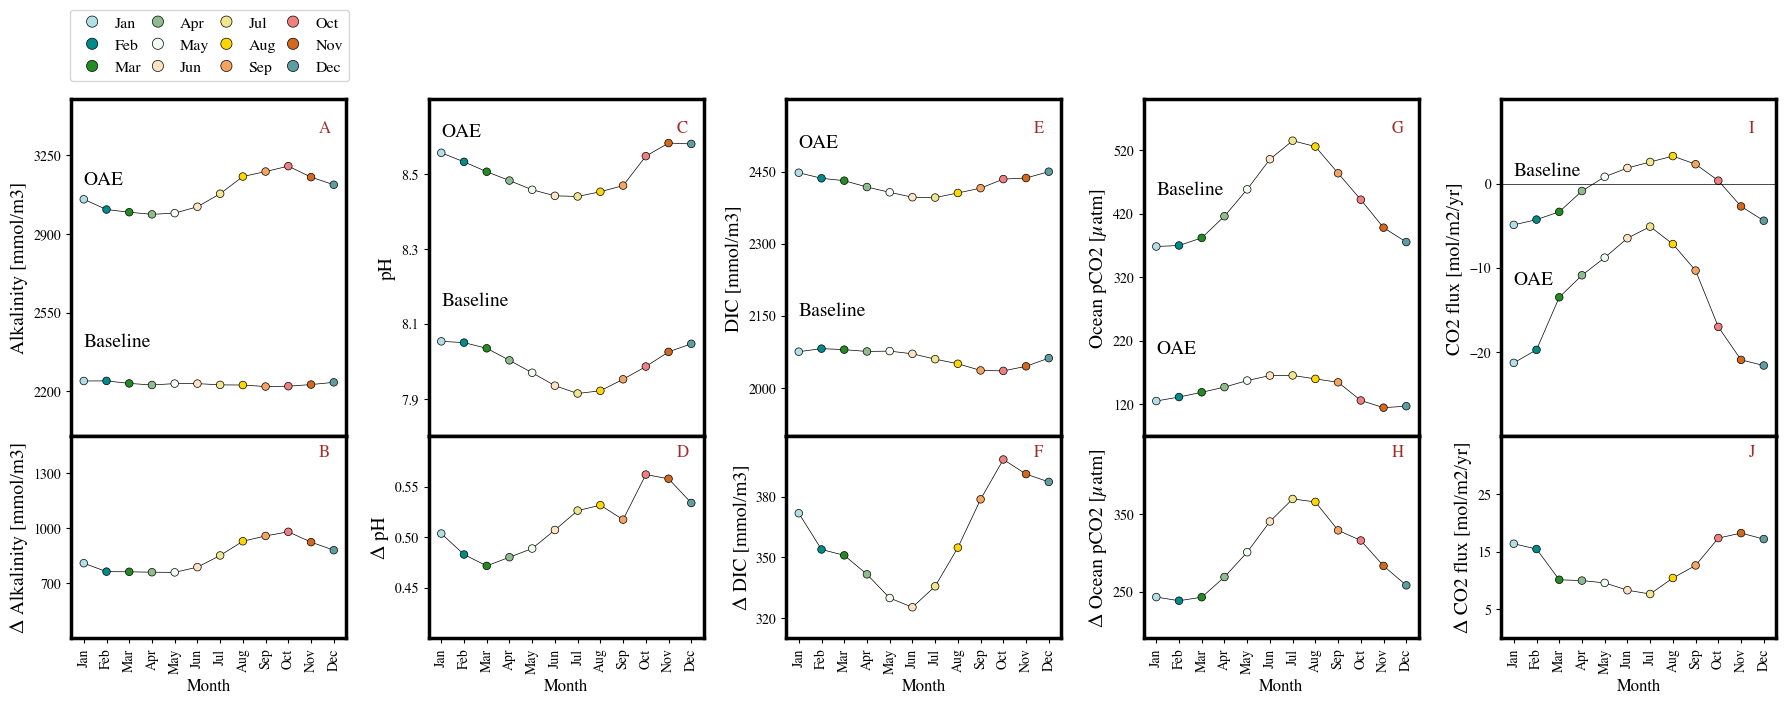

In [36]:
f, ((ax1, ax3, ax5, ax7, ax9), (ax2, ax4, ax6, ax8, ax0)) = plt.subplots(2,5, figsize=(22, 7), gridspec_kw={'height_ratios': [5, 3]}) 

plt.subplots_adjust(wspace=0.3, hspace=0)

ax1.plot(mean_baseline_alk.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax1.scatter(mean_baseline_alk.time_counter, mean_baseline_alk.ALK, color=mean_baseline_alk.time_counter.map(lambda x: colors_month_alk[x]), edgecolors='black',  linewidth=0.5, s=30)

ax1.plot(mean_oae_alk.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax1.scatter(mean_oae_alk.time_counter, mean_oae_alk.ALK, color=mean_oae_alk.time_counter.map(lambda x: colors_month_alk[x]), edgecolors='black',  linewidth=0.5, s=30)
ax1.tick_params(axis='y', which='major', labelsize=12)

ax2.plot(delta_alk_mean.alk, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(delta_alk_mean.time_counter, delta_alk_mean.alk, color=delta_alk_mean.time_counter.map(lambda x: colors_month_alk[x]), edgecolors='black',  linewidth=0.5, s=30)

ax3.plot(mean_baseline_ph.ph, '-', color="black", linewidth=0.5, zorder=1)
ax3.scatter(mean_baseline_ph.time_counter, mean_baseline_ph.ph, color=mean_baseline_ph.time_counter.map(lambda x: colors_month_ph[x]), edgecolors='black',  linewidth=0.5, s=30)

ax3.plot(mean_oae_ph.ph, '-', color="black", linewidth=0.5, zorder=1)
ax3.scatter(mean_oae_ph.time_counter, mean_oae_ph.ph, color=mean_oae_ph.time_counter.map(lambda x: colors_month_ph[x]), edgecolors='black',  linewidth=0.5, s=30)
ax3.tick_params(axis='y', which='major', labelsize=12)

ax4.plot(delta_ph_mean.ph, '-', color="black", linewidth=0.5, zorder=1)
ax4.scatter(delta_ph_mean.time_counter, delta_ph_mean.ph, color=delta_ph_mean.time_counter.map(lambda x: colors_month_ph[x]), edgecolors='black',  linewidth=0.5, s=30)

ax5.plot(mean_baseline_dic.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax5.scatter(mean_baseline_dic.time_counter, mean_baseline_dic.DIC, color=mean_baseline_dic.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)

ax5.plot(mean_oae_dic.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax5.scatter(mean_oae_dic.time_counter, mean_oae_dic.DIC, color=mean_oae_dic.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)
ax5.tick_params(axis='y', which='major', labelsize=12)

ax6.plot(delta_dic_mean.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax6.scatter(delta_dic_mean.time_counter, delta_dic_mean.DIC, color=delta_dic_mean.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)

ax7.plot(mean_baseline_fco2.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax7.scatter(mean_baseline_fco2.time_counter, mean_baseline_fco2.fco2, color=mean_baseline_fco2.time_counter.map(lambda x: colors_month_fco2[x]), edgecolors='black',  linewidth=0.5, s=30)

ax7.plot(mean_oae_fco2.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax7.scatter(mean_oae_fco2.time_counter, mean_oae_fco2.fco2, color=mean_oae_fco2.time_counter.map(lambda x: colors_month_fco2[x]), edgecolors='black',  linewidth=0.5, s=30)
ax7.tick_params(axis='y', which='major', labelsize=12)

ax8.plot(delta_fco2_mean.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax8.scatter(delta_fco2_mean.time_counter, delta_fco2_mean.fco2, color=delta_fco2_mean.time_counter.map(lambda x: colors_month_fco2[x]), edgecolors='black',  linewidth=0.5, s=30)

ax9.plot(mean_baseline_co2flux.co2flux, '-', color="black", linewidth=0.5, zorder=1)
ax9.scatter(mean_baseline_co2flux.time_counter, mean_baseline_co2flux.co2flux, color=mean_baseline_co2flux.time_counter.map(lambda x: colors_month_co2flux[x]), edgecolors='black',  linewidth=0.5, s=30)

ax9.plot(mean_oae_co2flux.co2flux, '-', color="black", linewidth=0.5, zorder=1)
ax9.scatter(mean_oae_co2flux.time_counter, mean_oae_co2flux.co2flux, color=mean_oae_co2flux.time_counter.map(lambda x: colors_month_co2flux[x]), edgecolors='black',  linewidth=0.5, s=30)
ax9.tick_params(axis='y', which='major', labelsize=12)

ax0.plot(delta_co2flux_mean.co2flux, '-', color="black", linewidth=0.5, zorder=1)
ax0.scatter(delta_co2flux_mean.time_counter, delta_co2flux_mean.co2flux, color=delta_co2flux_mean.time_counter.map(lambda x: colors_month_co2flux[x]), edgecolors='black',  linewidth=0.5, s=30)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax0]
for n, ax in enumerate(axes):
    ax.text(0.9, 0.9, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=12, weight='bold', color='brown')

for ax in axes:
    ax.tick_params(axis='x', which='major', labelsize=10, rotation=90)
    ax.tick_params(axis='y', which='major', labelsize=10)
    ax.set_xlabel('Month', fontsize=12)

ax1.set_ylabel('Alkalinity [mmol/m3]', fontsize=14)
ax2.set_ylabel('Δ Alkalinity [mmol/m3]', fontsize=14)
ax3.set_ylabel('pH', fontsize=14)
ax4.set_ylabel('Δ pH', fontsize=14)
ax5.set_ylabel('DIC [mmol/m3]', fontsize=14)
ax6.set_ylabel('Δ DIC [mmol/m3]', fontsize=14)
ax7.set_ylabel('Ocean pCO2 [µatm]', fontsize=14)
ax8.set_ylabel('Δ Ocean pCO2 [µatm]', fontsize=14)
ax9.set_ylabel('CO2 flux [mol/m2/yr]', fontsize=14)
ax0.set_ylabel('Δ CO2 flux [mol/m2/yr]', fontsize=14)

ax1.text(0, 2400, s='Baseline', fontsize=14)
ax1.text(0, 3120, s='OAE', fontsize=14)
ax3.text(0, 8.15, s='Baseline', fontsize=14)
ax3.text(0, 8.60, s='OAE', fontsize=14)
ax5.text(0, 2150, s='Baseline', fontsize=14)
ax5.text(0, 2500, s='OAE', fontsize=14)
ax7.text(0, 450, s='Baseline', fontsize=14)
ax7.text(0, 200, s='OAE', fontsize=14)
ax9.text(0, 1, s='Baseline', fontsize=14)
ax9.text(0, -12, s='OAE', fontsize=14)

start1, end1 = ax1.set_ylim(2000, 3500)
ax1.yaxis.set_ticks(np.arange(start1+200, end1, 350))
start2, end2 = ax2.set_ylim(400, 1500)
ax2.yaxis.set_ticks(np.arange(start2+300, end2-100, 300))
start3, end3 = ax3.set_ylim(7.8, 8.7)
ax3.yaxis.set_ticks(np.arange(start3+0.1, end3, 0.2))
start4, end4 = ax4.set_ylim(0.4, 0.6)
ax4.yaxis.set_ticks(np.arange(start4+0.05, end4, 0.05))
start5, end5 = ax5.set_ylim(1900, 2600)
ax5.yaxis.set_ticks(np.arange(start5+100, end5, 150))
start6, end6 = ax6.set_ylim(310, 410)
ax6.yaxis.set_ticks(np.arange(start6+10, end6, 30))
start7, end7 = ax7.set_ylim(70, 600)
ax7.yaxis.set_ticks(np.arange(start7+50, end7, 100))
start8, end8 = ax8.set_ylim(190, 450)
ax8.yaxis.set_ticks(np.arange(start8+60, end8, 100))
start9, end9 = ax9.set_ylim(-30, 10)
ax9.yaxis.set_ticks(np.arange(start9+10, end9, 10))
start0, end0 = ax0.set_ylim(-0, 35)
ax0.yaxis.set_ticks(np.arange(start0+5, end0-5, 10))

ax9.axhline(0, color='black', linewidth=0.5)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month_alk.items()]
ax.legend(handles = legend, bbox_to_anchor=(-4.16,3.15), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=11.5, ncol = 4, handler_map={mpatches.Circle: HandlerEllipse()})

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/finals/dp_monthlyaverage.png')

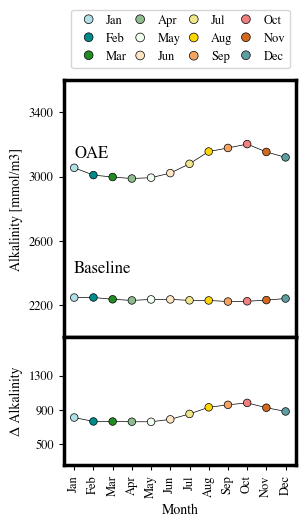

In [44]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(3, 5), gridspec_kw={'height_ratios': [2, 1]}) 
plt.subplots_adjust(hspace=0)

ax1.plot(mean_baseline_alk.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax1.scatter(mean_baseline_alk.time_counter, mean_baseline_alk.ALK, color=mean_baseline_alk.time_counter.map(lambda x: colors_month_alk[x]), edgecolors='black',  linewidth=0.5, s=30)

ax1.plot(mean_oae_alk.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax1.scatter(mean_oae_alk.time_counter, mean_oae_alk.ALK, color=mean_oae_alk.time_counter.map(lambda x: colors_month_alk[x]), edgecolors='black',  linewidth=0.5, s=30)
ax1.tick_params(axis='y', which='major', labelsize=12)

ax2.plot(delta_alk_mean.alk, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(delta_alk_mean.time_counter, delta_alk_mean.alk, color=delta_alk_mean.time_counter.map(lambda x: colors_month_alk[x]), edgecolors='black',  linewidth=0.5, s=30)

axes = [ax1, ax2]

for ax in axes:
    ax.tick_params(axis='x', which='major', labelsize=9, rotation=90)
    ax.tick_params(axis='y', which='major', labelsize=9)
    ax.set_xlabel('Month', fontsize=10)
    
ax1.set_ylabel('Alkalinity [mmol/m3]', fontsize=10)
ax2.set_ylabel('Δ Alkalinity', fontsize=10)

start1, end1 = ax1.set_ylim(2000, 3600)
ax1.yaxis.set_ticks(np.arange(start1+200, end1-100, 400))
start2, end2 = ax2.set_ylim(250, 1750)
ax2.yaxis.set_ticks(np.arange(start2+250, end2-100, 400))

ax1.text(0, 2400, s='Baseline', fontsize=12)
ax1.text(0, 3120, s='OAE', fontsize=12)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month_alk.items()]
ax.legend(handles = legend, bbox_to_anchor=(1,3.6), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 4, handler_map={mpatches.Circle: HandlerEllipse()})

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/finals/alk_dp.png')

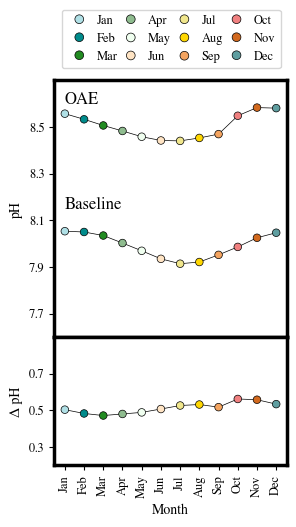

In [56]:
f, (ax3, ax4) = plt.subplots(2,1, figsize=(3, 5), gridspec_kw={'height_ratios': [2, 1]}) 
plt.subplots_adjust(hspace=0)

ax3.plot(mean_baseline_ph.ph, '-', color="black", linewidth=0.5, zorder=1)
ax3.scatter(mean_baseline_ph.time_counter, mean_baseline_ph.ph, color=mean_baseline_ph.time_counter.map(lambda x: colors_month_ph[x]), edgecolors='black',  linewidth=0.5, s=30)

ax3.plot(mean_oae_ph.ph, '-', color="black", linewidth=0.5, zorder=1)
ax3.scatter(mean_oae_ph.time_counter, mean_oae_ph.ph, color=mean_oae_ph.time_counter.map(lambda x: colors_month_ph[x]), edgecolors='black',  linewidth=0.5, s=30)
ax3.tick_params(axis='y', which='major', labelsize=12)

ax4.plot(delta_ph_mean.ph, '-', color="black", linewidth=0.5, zorder=1)
ax4.scatter(delta_ph_mean.time_counter, delta_ph_mean.ph, color=delta_ph_mean.time_counter.map(lambda x: colors_month_ph[x]), edgecolors='black',  linewidth=0.5, s=30)

axes = [ax3, ax4]

for ax in axes:
    ax.tick_params(axis='x', which='major', labelsize=9, rotation=90)
    ax.tick_params(axis='y', which='major', labelsize=9)
    ax.set_xlabel('Month', fontsize=10)
    
ax3.set_ylabel('pH', fontsize=10)
ax4.set_ylabel('Δ pH', fontsize=10)

start3, end3 = ax3.set_ylim(7.6, 8.7)
ax3.yaxis.set_ticks(np.arange(start3+0.1, end3-0.1, 0.2))
start4, end4 = ax4.set_ylim(0.2, 0.9)
ax4.yaxis.set_ticks(np.arange(start4+0.1, end4, 0.2))

ax3.text(0, 8.15, s='Baseline', fontsize=12)
ax3.text(0, 8.60, s='OAE', fontsize=12)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month_alk.items()]
ax.legend(handles = legend, bbox_to_anchor=(1,3.6), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 4, handler_map={mpatches.Circle: HandlerEllipse()})

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/ph_dp.png')

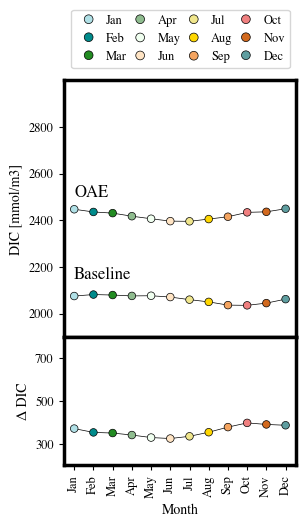

In [60]:
f, (ax5, ax6) = plt.subplots(2,1, figsize=(3, 5), gridspec_kw={'height_ratios': [2, 1]}) 
plt.subplots_adjust(hspace=0)

ax5.plot(mean_baseline_dic.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax5.scatter(mean_baseline_dic.time_counter, mean_baseline_dic.DIC, color=mean_baseline_dic.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)

ax5.plot(mean_oae_dic.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax5.scatter(mean_oae_dic.time_counter, mean_oae_dic.DIC, color=mean_oae_dic.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)
ax5.tick_params(axis='y', which='major', labelsize=12)

ax6.plot(delta_dic_mean.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax6.scatter(delta_dic_mean.time_counter, delta_dic_mean.DIC, color=delta_dic_mean.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)

axes = [ax5, ax6]

for ax in axes:
    ax.tick_params(axis='x', which='major', labelsize=9, rotation=90)
    ax.tick_params(axis='y', which='major', labelsize=9)
    ax.set_xlabel('Month', fontsize=10)
    
ax5.set_ylabel('DIC [mmol/m3]', fontsize=10)
ax6.set_ylabel('Δ DIC', fontsize=10)

start5, end5 = ax5.set_ylim(1900, 3000)
ax5.yaxis.set_ticks(np.arange(start5+100, end5, 200))
start6, end6 = ax6.set_ylim(200, 800)
ax6.yaxis.set_ticks(np.arange(start6+100, end6-50, 200))

ax5.text(0, 2150, s='Baseline', fontsize=12)
ax5.text(0, 2500, s='OAE', fontsize=12)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month_alk.items()]
ax.legend(handles = legend, bbox_to_anchor=(1,3.6), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 4, handler_map={mpatches.Circle: HandlerEllipse()})

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/finals/dic_dp.png')

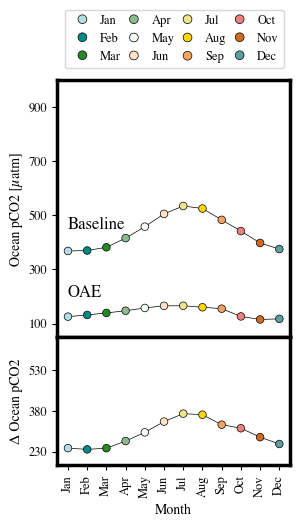

In [53]:
f, (ax7, ax8) = plt.subplots(2,1, figsize=(3, 5), gridspec_kw={'height_ratios': [2, 1]}) 
plt.subplots_adjust(hspace=0)

ax7.plot(mean_baseline_fco2.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax7.scatter(mean_baseline_fco2.time_counter, mean_baseline_fco2.fco2, color=mean_baseline_fco2.time_counter.map(lambda x: colors_month_fco2[x]), edgecolors='black',  linewidth=0.5, s=30)

ax7.plot(mean_oae_fco2.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax7.scatter(mean_oae_fco2.time_counter, mean_oae_fco2.fco2, color=mean_oae_fco2.time_counter.map(lambda x: colors_month_fco2[x]), edgecolors='black',  linewidth=0.5, s=30)
ax7.tick_params(axis='y', which='major', labelsize=12)

ax8.plot(delta_fco2_mean.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax8.scatter(delta_fco2_mean.time_counter, delta_fco2_mean.fco2, color=delta_fco2_mean.time_counter.map(lambda x: colors_month_fco2[x]), edgecolors='black',  linewidth=0.5, s=30)

axes = [ax7, ax8]

for ax in axes:
    ax.tick_params(axis='x', which='major', labelsize=9, rotation=90)
    ax.tick_params(axis='y', which='major', labelsize=9)
    ax.set_xlabel('Month', fontsize=10)
    
ax7.set_ylabel('Ocean pCO2 [µatm]', fontsize=10)
ax8.set_ylabel('Δ Ocean pCO2', fontsize=10)

start7, end7 = ax7.set_ylim(50, 1000)
ax7.yaxis.set_ticks(np.arange(start7+50, end7, 200))
start8, end8 = ax8.set_ylim(180, 650)
ax8.yaxis.set_ticks(np.arange(start8+50, end8-50, 150))

ax7.text(0, 450, s='Baseline', fontsize=12)
ax7.text(0, 200, s='OAE', fontsize=12)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month_alk.items()]
ax.legend(handles = legend, bbox_to_anchor=(1,3.6), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 4, handler_map={mpatches.Circle: HandlerEllipse()})

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/finals/fco2_dp.png')

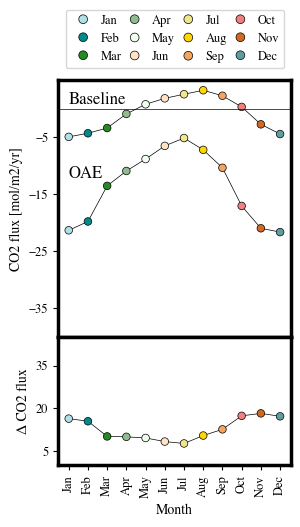

In [46]:
f, (ax9, ax0) = plt.subplots(2,1, figsize=(3, 5), gridspec_kw={'height_ratios': [2, 1]}) 
plt.subplots_adjust(hspace=0)

ax9.plot(mean_baseline_co2flux.co2flux, '-', color="black", linewidth=0.5, zorder=1)
ax9.scatter(mean_baseline_co2flux.time_counter, mean_baseline_co2flux.co2flux, color=mean_baseline_co2flux.time_counter.map(lambda x: colors_month_co2flux[x]), edgecolors='black',  linewidth=0.5, s=30)

ax9.plot(mean_oae_co2flux.co2flux, '-', color="black", linewidth=0.5, zorder=1)
ax9.scatter(mean_oae_co2flux.time_counter, mean_oae_co2flux.co2flux, color=mean_oae_co2flux.time_counter.map(lambda x: colors_month_co2flux[x]), edgecolors='black',  linewidth=0.5, s=30)
ax9.tick_params(axis='y', which='major', labelsize=12)

ax0.plot(delta_co2flux_mean.co2flux, '-', color="black", linewidth=0.5, zorder=1)
ax0.scatter(delta_co2flux_mean.time_counter, delta_co2flux_mean.co2flux, color=delta_co2flux_mean.time_counter.map(lambda x: colors_month_co2flux[x]), edgecolors='black',  linewidth=0.5, s=30)

ax8.scatter(delta_fco2_mean.time_counter, delta_fco2_mean.fco2, color=delta_fco2_mean.time_counter.map(lambda x: colors_month_fco2[x]), edgecolors='black',  linewidth=0.5, s=30)

axes = [ax9, ax0]

for ax in axes:
    ax.tick_params(axis='x', which='major', labelsize=9, rotation=90)
    ax.tick_params(axis='y', which='major', labelsize=9)
    ax.set_xlabel('Month', fontsize=10)
    
ax9.set_ylabel('CO2 flux [mol/m2/yr]', fontsize=10)
ax0.set_ylabel('Δ CO2 flux', fontsize=10)

start9, end9 = ax9.set_ylim(-40, 5)
ax9.yaxis.set_ticks(np.arange(start9+5, end9, 10))
start0, end0 = ax0.set_ylim(0, 45)
ax0.yaxis.set_ticks(np.arange(start0+5, end0-5, 15))

ax9.text(0, 1, s='Baseline', fontsize=12)
ax9.text(0, -12, s='OAE', fontsize=12)

ax9.axhline(0, color='black', linewidth=0.5)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month_alk.items()]
ax.legend(handles = legend, bbox_to_anchor=(1,3.6), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 4, handler_map={mpatches.Circle: HandlerEllipse()})

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/finals/co2flux_dp.png')